In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [44]:
!git clone https://github.com/xahidbuffon/FUnIE-GAN

Cloning into 'FUnIE-GAN'...
remote: Enumerating objects: 1088, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 1088 (delta 14), reused 24 (delta 10), pack-reused 1054
Receiving objects: 100% (1088/1088), 126.27 MiB | 33.66 MiB/s, done.
Resolving deltas: 100% (616/616), done.


In [1]:
!git clone https://github.com/sourjyadip/ROV_GAN

Cloning into 'ROV_GAN'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 53 (delta 13), reused 46 (delta 9), pack-reused 0
Unpacking objects: 100% (53/53), done.


In [2]:
pip install -U PyYAML

     |████████████████████████████████| 645kB 3.9MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


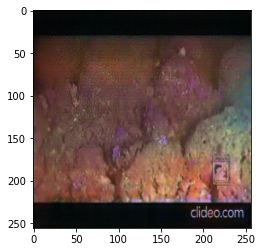

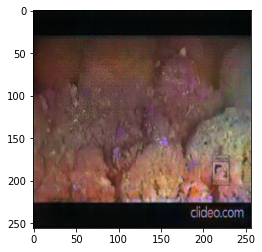

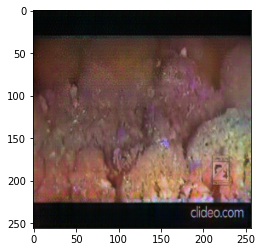

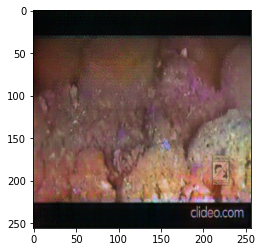

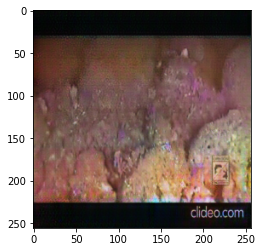

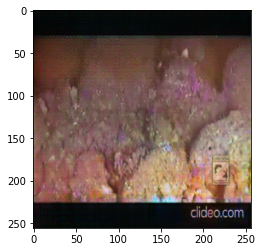

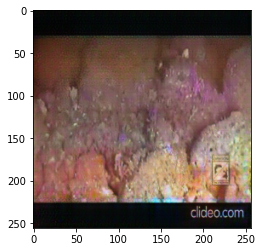

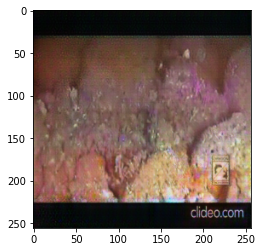

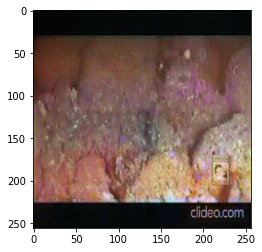

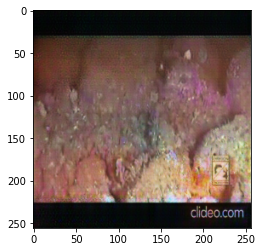

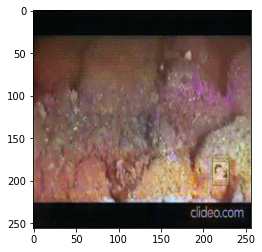

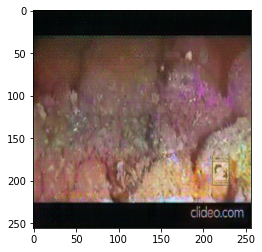

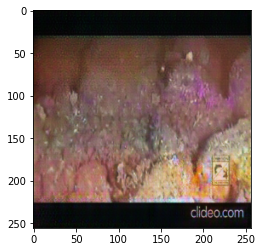

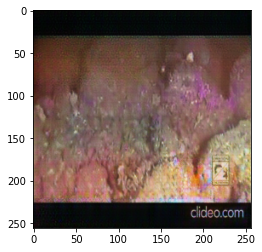

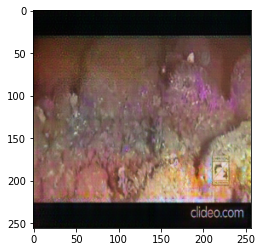

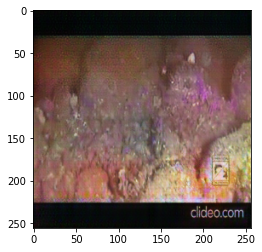

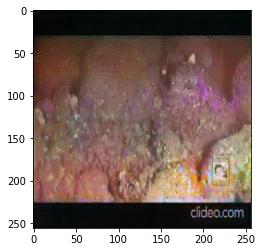

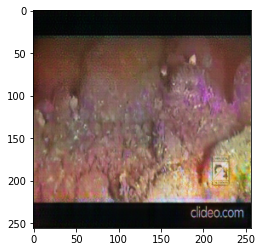

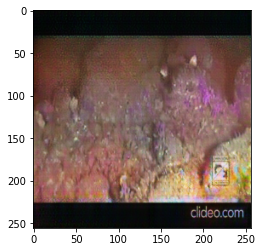

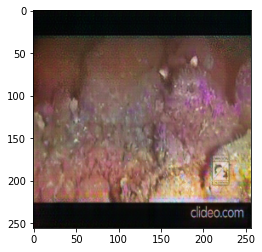

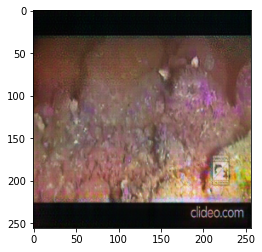

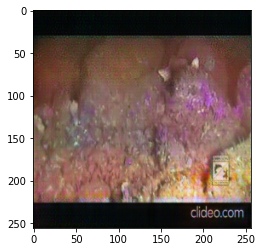

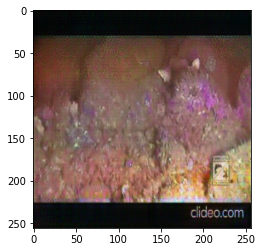

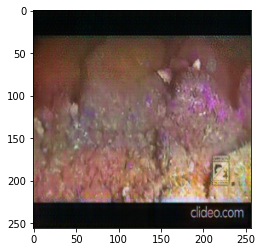

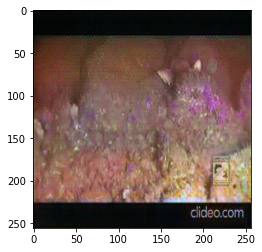

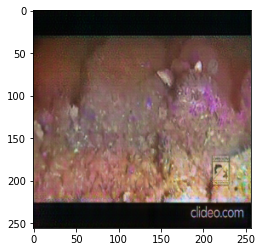

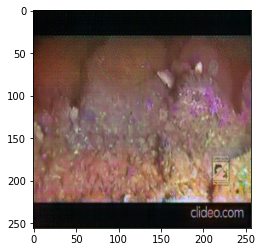

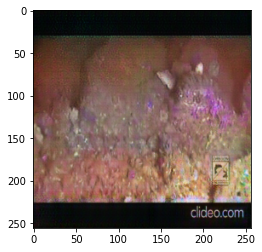

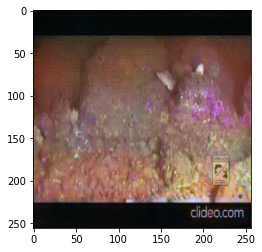

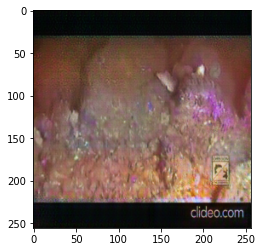

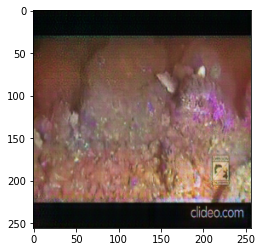

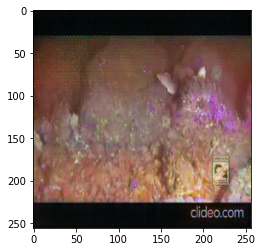

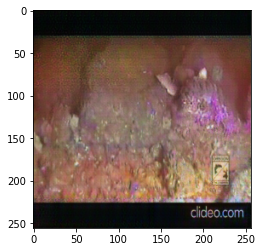

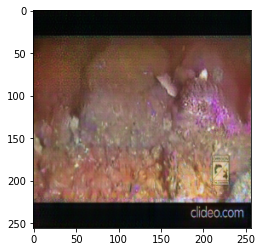

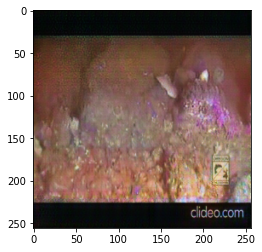

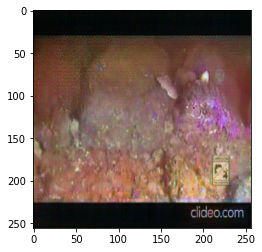

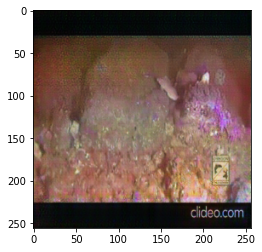

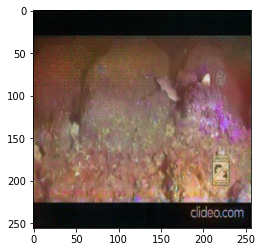

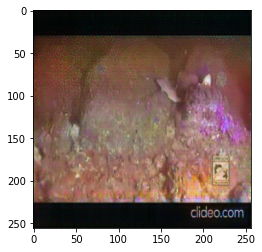

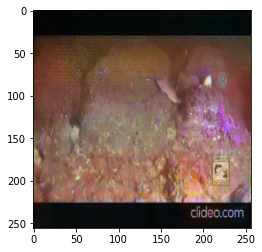

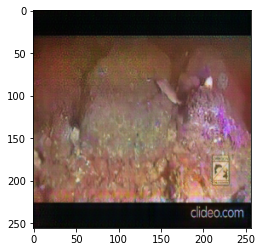

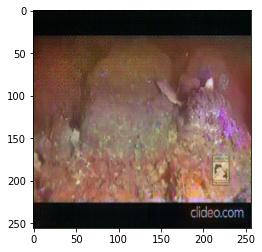

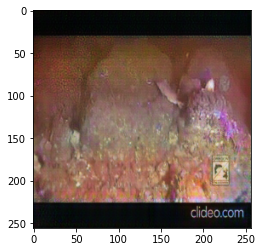

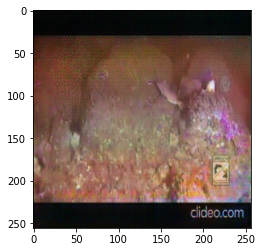

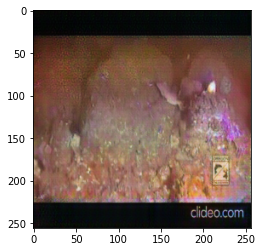

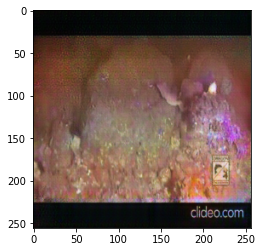

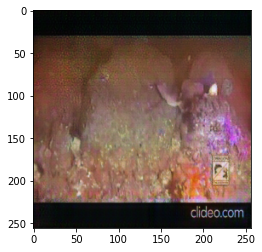

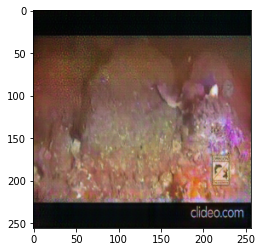

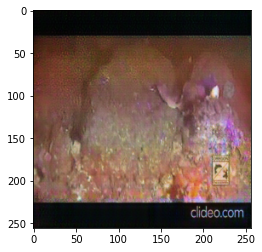

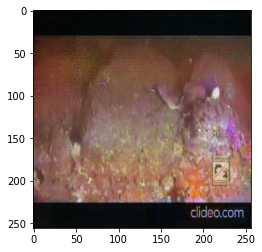

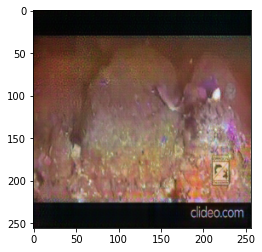

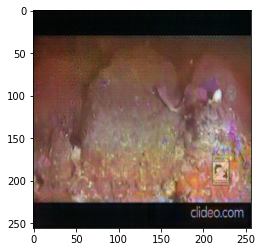

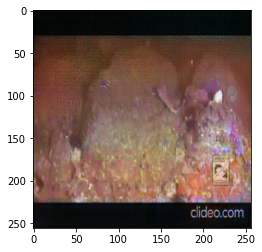

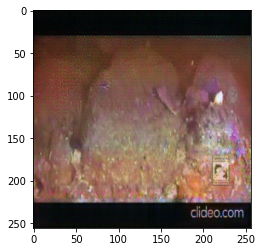

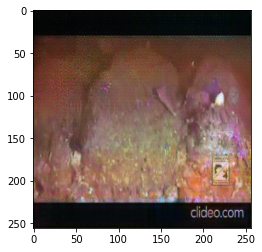

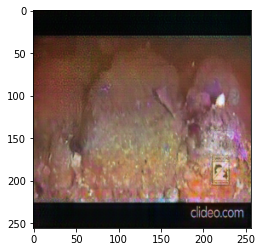

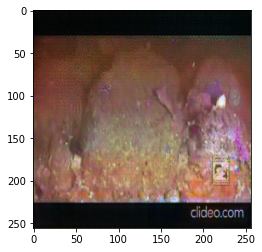

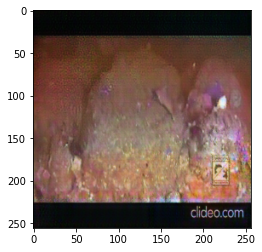

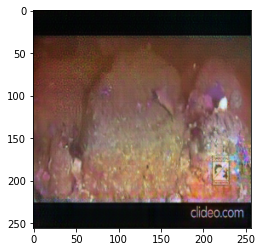

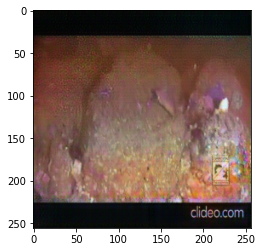

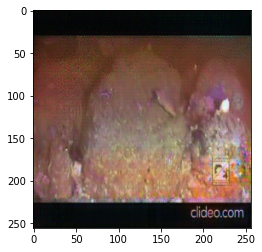

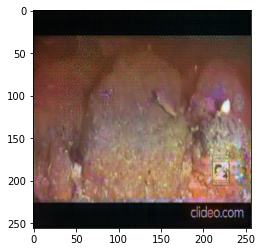

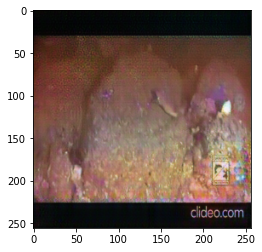

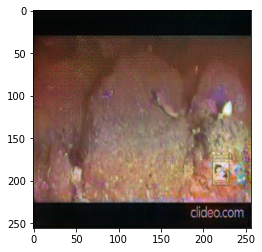

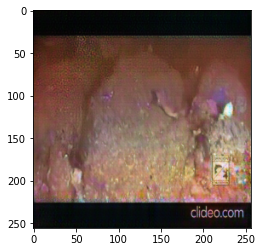

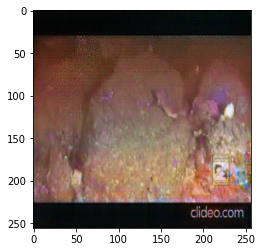

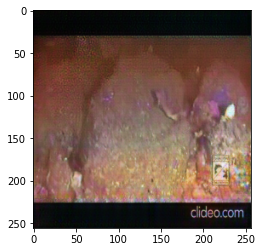

In [46]:
import os
import sys
import yaml
import argparse
import numpy as np
import PIL
# pytorch libs
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torchvision.transforms as transforms
from torch import Tensor
import matplotlib.pyplot as plt
import cv2

import sys
sys.path.append('/content/ROV_GAN')

# local libs
from nets.commons import Weights_Normal, VGG19_PercepLoss
from nets.funiegan import GeneratorFunieGAN, DiscriminatorFunieGAN
from utils.data_utils import GetTrainingPairs, GetValImage


def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = image_name
    image = loader(image)
    imgs_val = Variable(image.type(Tensor))
    #imgs_gen = generator(imgs_val)
    #return image.cuda()  #assumes that you're using GPU
    return imgs_val

generator = GeneratorFunieGAN()
generator.load_state_dict(torch.load('/content/ROV_GAN/generator.pth'))
#generator.load_state_dict(torch.load('/content/FUnIE-GAN/PyTorch/models/funie_generator.pth'))

cap = cv2.VideoCapture('/rov_clipped.mp4')
img_height = 256
img_width = 256
dim = (img_width, img_height)

loader = transforms.Compose([transforms.Resize((img_height, img_width), PIL.Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
#out = cv2.VideoWriter('/content/rov_output.mp4',fourcc, 20.0, (256,256))
while(cap.isOpened()):
    ret, img = cap.read()
    if ret==True:
        
        img = PIL.Image.fromarray(img)
        img = img.resize(dim)
        
        imgs_val = image_loader(img)
        
        imgs_gen = generator(imgs_val[None, ...])
        imgs_gen  = Tensor.cpu(imgs_gen)
        
        
        imgs_gen = imgs_gen.squeeze().permute(1,2,0)
        imgs_gen = imgs_gen.detach().numpy()
        imgs_gen = imgs_gen[:,:,:]*([ 0.5, 0.5, 0.5])+([ 0.5, 0.5, 0.5 ])
        #imgs_gen = np.asarray(imgs_gen)
        #print(imgs_gen.dtype)
        #imgs_gen  = imgs_gen.round().astype('uint8')
        #print(imgs_gen)
        #print(imgs_gen.shape)
        '''
        imgs_gen = imgs_gen.squeeze().permute(1,2,0)
        imgs_gen = imgs_gen.detach().numpy()
        imgs_output = transforms.ToPILImage()(imgs_gen).convert("RGB")
        print(imgs_output.shape)
        '''
        #out.write(imgs_gen)
        plt.imshow(imgs_gen)
        plt.show()
    else:
        break
    

cap.release()
#out.release()


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


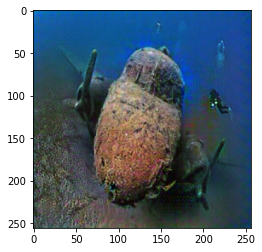

In [33]:
img_height = 256
img_width = 256
dim = (img_width, img_height)

img = PIL.Image.open('/wreck1.jpg')
img = img.resize(dim)

loader = transforms.Compose([transforms.Resize((img_height, img_width), PIL.Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = image_name
    image = loader(image)
    imgs_val = Variable(image.type(Tensor))
    #imgs_gen = generator(imgs_val)
    #return image.cuda()  #assumes that you're using GPU
    return imgs_val

imgs_val = image_loader(img)

imgs_gen = generator(imgs_val[None, ...])
imgs_gen  = Tensor.cpu(imgs_gen)
imgs_gen = imgs_gen.squeeze().permute(1,2,0)
imgs_gen = imgs_gen.detach().numpy()

#plt.imshow(imgs_gen)
plt.imshow(imgs_gen[:,:,:]*([ 0.5, 0.5, 0.5])+([ 0.5, 0.5, 0.5 ]))
plt.show()